# Pitch & Roll data analysis

In [113]:
import json
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
N_EPISODES = 540
FRAMES_PER_EPISODE = 400

### Finds highest absolute pitch & roll for all episodes and all labels

In [40]:
highest_p = 0
highest_r = 0
labels = [0,1,2,5,10,15,20,25,30]
for episodeNr in range(1,541):
    for labelNr in labels:
        try:
            # Opening JSON file
            f = open('../3dmodel/test_4_episode_'+str(episodeNr)+'/labels_'+str(labelNr)+'.json')
            
            # returns JSON object as a dictionary
            data = json.load(f)
            
            # Iterating through the json list
            for i in data:
                p = abs(data[i][0])
                r = abs(data[i][1])
                if(p>highest_p):
                    highest_p = p
                if(r>highest_r):
                    highest_r = r

            # Closing file
            f.close()
        except:
            continue
print(highest_p, highest_r) 

61.3279475386535 62.21733379123754


### Extract one dataframe per label from all episodes

In [43]:
# load all data
labels = [0,1,2,5,10,15,20,25,30]
dataframes = []
for label in tqdm(labels):
    episodes = []
    for ep in range(1, N_EPISODES+1):
        filename = "../3dmodel/test_4_episode_"+ str(ep) +"/labels_"+ str(label) +".json"
        try:
            data = json.load(open(filename))
            
            for point in data:
                episodes.append(data[point]+[ep, point])

        except Exception as e:
            continue

    p_r_df = pd.DataFrame(episodes)
    p_r_df.rename(columns = {0:'pitch', 1:'roll', 2:'episode', 3:'position_within_episode'}, inplace=True)
    p_r_df = p_r_df.astype({"pitch": float, "roll": float})
    dataframes.append(p_r_df)

dataframe_dict = dict(zip(labels, dataframes))

  0%|          | 0/9 [00:00<?, ?it/s]

In [98]:
dataframe_dict.get(0)

,pitch,roll,episode,position_within_episode
0,15.915869,2.358416,1,0
1,14.295925,1.700391,1,1
2,6.213590,1.611325,1,2
3,1.235337,6.175461,1,3
4,1.341678,3.695468,1,4
...,...,...,...,...
215995,0.428497,-0.663964,540,395
215996,0.485498,-1.376229,540,396
215997,-0.658033,-1.328761,540,397
215998,-1.322262,-1.650465,540,398


In [99]:
all_pitch = pd.DataFrame()
all_roll = pd.DataFrame()
for key in dataframe_dict.keys():
    df = dataframe_dict.get(key)
    pitch = "pitch_"+str(key)
    roll = "roll_"+str(key)
    all_pitch[pitch] = df["pitch"]
    all_roll[roll] = df["roll"]

describe1 = all_pitch.describe()
describe2 = all_roll.describe()

In [100]:
describe1

,pitch_0,pitch_1,pitch_2,pitch_5,pitch_10,pitch_15,pitch_20,pitch_25,pitch_30
count,216000.000000,128309.000000,127663.000000,125725.000000,122495.000000,119265.000000,116035.000000,112805.000000,109575.000000
mean,0.067844,-0.084864,-0.107256,-0.100462,-0.090511,-0.099893,-0.105084,-0.095389,-0.107801
std,6.611220,6.642388,6.626167,6.567844,6.531722,6.510263,6.496964,6.470887,6.465280
min,-53.721279,-53.721279,-53.721279,-53.721279,-53.721279,-53.721279,-53.721279,-53.721279,-53.721279
25%,-2.760713,-3.234515,-3.241131,-3.230083,-3.207179,-3.196336,-3.194786,-3.167921,-3.163679
50%,0.026246,-0.055638,-0.065767,-0.069439,-0.063333,-0.075394,-0.092013,-0.072208,-0.060108
75%,2.876398,3.109895,3.084898,3.063062,3.041653,3.020865,3.010117,3.016302,2.998242
max,61.327948,61.327948,61.327948,61.327948,61.327948,61.327948,61.327948,61.327948,61.327948


In [101]:
describe2

,roll_0,roll_1,roll_2,roll_5,roll_10,roll_15,roll_20,roll_25,roll_30
count,216000.000000,128309.000000,127663.000000,125725.000000,122495.000000,119265.000000,116035.000000,112805.000000,109575.000000
mean,0.302944,0.250125,0.253208,0.256671,0.264241,0.263540,0.267740,0.277121,0.278316
std,7.021762,6.831039,6.841609,6.875649,6.924513,6.979096,7.017278,7.063515,7.100044
min,-58.846396,-53.181349,-53.181349,-53.181349,-53.181349,-53.181349,-53.181349,-53.181349,-53.181349
25%,-2.572059,-2.932393,-2.939085,-2.971420,-2.996049,-3.034725,-3.050122,-3.082875,-3.093130
50%,0.229709,0.209078,0.210038,0.200926,0.211926,0.212025,0.215539,0.215596,0.215847
75%,3.187162,3.397185,3.406982,3.437116,3.477812,3.504470,3.525151,3.567211,3.570848
max,62.217334,62.217334,62.217334,62.217334,62.217334,62.217334,62.217334,62.217334,62.217334


<AxesSubplot:ylabel='Frequency'>

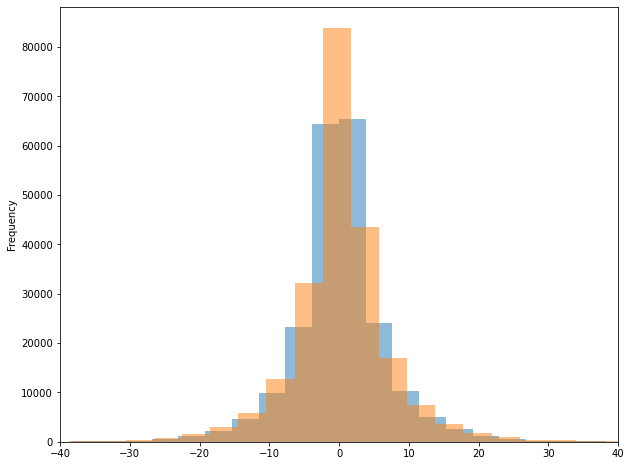

In [122]:
label0_df = dataframe_dict.get(0)
pitch = label0_df.pitch.plot.hist(bins = 30, figsize=(10, 8), xlim=[-40,40], alpha=0.5)
roll = label0_df.roll.plot.hist(bins = 30, figsize=(10, 8), xlim=[-40,40], alpha=0.5)
pitch